## Import libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Load dataset

In [2]:
dataframe = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
# dataframe = pd.read_csv('iris.csv', header=None)
dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


change class names by numbers

In [3]:
mappings = {
   'setosa': 0,
   'versicolor': 1,
   'virginica': 2
}

dataframe['species'] = dataframe['species'].apply(lambda x: mappings[x])

In [ ]:
#dataset = dataframe.values
#x = dataset[:,0:4]
#y = dataset[:,4]

In [ ]:
#print(x)
#print(y)

## Train/Test Split

In [4]:
X = dataframe.drop('species', axis=1).values
y = dataframe['species'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [5]:
print(X_train[0:5,:])
print(y_train[0:-1])

tensor([[4.6000, 3.6000, 1.0000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.4000, 3.2000, 1.3000, 0.2000]])
tensor([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0,
        2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1,
        0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0,
        0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
        2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1])


## Defining an Artificial Neural Network Model

In [6]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=4, out_features=16)
        self.fc2 = nn.Linear(in_features=16, out_features=12)
        self.output = nn.Linear(in_features=12, out_features=3)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x

In [7]:
model = MLP()
model

MLP(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=12, bias=True)
  (output): Linear(in_features=12, out_features=3, bias=True)
)

## Defining loss function and Optimizer

In [8]:
loss_fcn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Model Training

In [9]:
%%time
epochs = 100
loss_arr = []
for i in range(epochs):
    epoch_loss = []
    y_hat = model.forward(X_train)
    loss = loss_fcn(y_hat, y_train)
    
    
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_loss.append(loss.data.detach().numpy())
    loss_arr.append(epoch_loss)

Epoch: 0 Loss: 1.1276360750198364
Epoch: 10 Loss: 0.9201213121414185
Epoch: 20 Loss: 0.5689420104026794
Epoch: 30 Loss: 0.37538546323776245
Epoch: 40 Loss: 0.22464194893836975
Epoch: 50 Loss: 0.12385561317205429
Epoch: 60 Loss: 0.08635012060403824
Epoch: 70 Loss: 0.07352578639984131
Epoch: 80 Loss: 0.06757732480764389
Epoch: 90 Loss: 0.06406132876873016
CPU times: user 71.1 ms, sys: 12.1 ms, total: 83.2 ms
Wall time: 193 ms


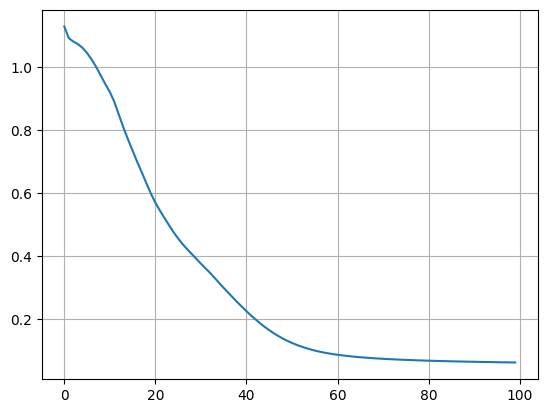

In [10]:
plt.plot(loss_arr)
plt.grid()
plt.show()

## Model Evaluation

In [11]:
preds = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

We can now make a Pandas DataFrame with the predictions.

In [12]:
df = pd.DataFrame({'Y': y_test, 'YHat': preds})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df.head()

,Y,YHat,Correct
0,1,1,1
1,0,0,1
2,2,2,1
3,1,1,1
4,1,1,1


## Accuracy

In [13]:
df['Correct'].sum() / len(df)

1.0